In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [103]:
data = pd.read_csv('dataset/Project Dataset/sales_data.csv')

In [104]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst = True)
data = data.sort_values(by = 'Date')


In [105]:
# Creating a pivot table where each row represents a product, 
# and each column represents sales on a particular day.
sales_pivot = data.pivot_table(index = 'Model', columns = 'Date', values = 'Quantity', aggfunc = 'sum', fill_value = 0)
sales_pivot

Date,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10,...,2024-04-21,2024-04-22,2024-04-23,2024-04-24,2024-04-25,2024-04-26,2024-04-27,2024-04-28,2024-04-29,2024-04-30
Model,,,,,,,,,,,,,,,,,,,,,
12 C AC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12 inch Fan,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14 inch Fan,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,5.0,1.0,...,1.0,1.0,2.0,2.0,2.0,0.0,3.0,2.0,5.0,11.0
17 inch Fan,0.0,0.0,0.0,1.0,1.0,6.0,3.0,2.0,6.0,3.0,...,7.0,8.0,3.0,8.0,6.0,0.0,11.0,20.0,25.0,38.0
18 A AC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tornedo Fan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wall Move,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Washing Machine,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [106]:
# Normalizing the Data
scaler = StandardScaler()
sales_scaled = scaler.fit_transform(sales_pivot.iloc[:, :-1])

In [107]:
scaled_df = pd.DataFrame(sales_scaled, columns = sales_pivot.columns[:-1], index = sales_pivot.index)

# Printing the scaled DataFrame
scaled_df

Date,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10,...,2024-04-20,2024-04-21,2024-04-22,2024-04-23,2024-04-24,2024-04-25,2024-04-26,2024-04-27,2024-04-28,2024-04-29
Model,,,,,,,,,,,,,,,,,,,,,
12 C AC,0.0,-0.351123,-0.248299,-0.294984,-0.234283,-0.189431,-0.205847,-0.172929,-0.273777,-0.247833,...,-0.213077,-0.196825,2.326068,-0.240717,-0.212479,-0.251795,0.0,-0.216588,0.416843,-0.141575
12 inch Fan,0.0,-0.351123,-0.248299,-0.294984,-0.234283,1.474860,-0.205847,4.081115,3.467839,2.523393,...,-0.213077,-0.196825,-0.205847,-0.240717,-0.212479,-0.251795,0.0,-0.216588,-0.134466,-0.141575
14 inch Fan,0.0,2.048220,2.805776,-0.294984,-0.234283,3.139150,2.326068,-0.172929,5.962250,2.523393,...,8.173625,1.227260,1.060111,3.460310,2.276563,2.563728,0.0,1.886599,0.968152,2.035146
17 inch Fan,0.0,-0.351123,-0.248299,1.972706,3.367818,9.796314,7.389898,8.335159,7.209456,8.065846,...,6.076950,9.771765,9.921813,5.310823,9.743690,8.194773,0.0,7.495098,10.891715,10.742034
18 A AC,0.0,-0.351123,-0.248299,-0.294984,-0.234283,-0.189431,-0.205847,-0.172929,-0.273777,-0.247833,...,-0.213077,-0.196825,-0.205847,-0.240717,-0.212479,-0.251795,0.0,0.484474,-0.134466,-0.141575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tornedo Fan,0.0,-0.351123,-0.248299,-0.294984,-0.234283,-0.189431,-0.205847,-0.172929,-0.273777,-0.247833,...,-0.213077,-0.196825,-0.205847,-0.240717,-0.212479,-0.251795,0.0,-0.216588,-0.134466,-0.141575
Wall Move,0.0,-0.351123,-0.248299,-0.294984,-0.234283,-0.189431,-0.205847,-0.172929,-0.273777,-0.247833,...,-0.213077,1.227260,-0.205847,1.609796,-0.212479,-0.251795,0.0,-0.216588,-0.134466,-0.141575
Washing Machine,0.0,-0.351123,-0.248299,1.972706,-0.234283,-0.189431,-0.205847,-0.172929,-0.273777,2.523393,...,0.835261,-0.196825,2.326068,-0.240717,-0.212479,-0.251795,0.0,0.484474,-0.134466,-0.141575


In [108]:
# Choosing the number of clusters
num_clusters = 10

# Applying K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(sales_scaled)

# Adding the cluster labels to your original pivot table
sales_pivot['Cluster'] = clusters

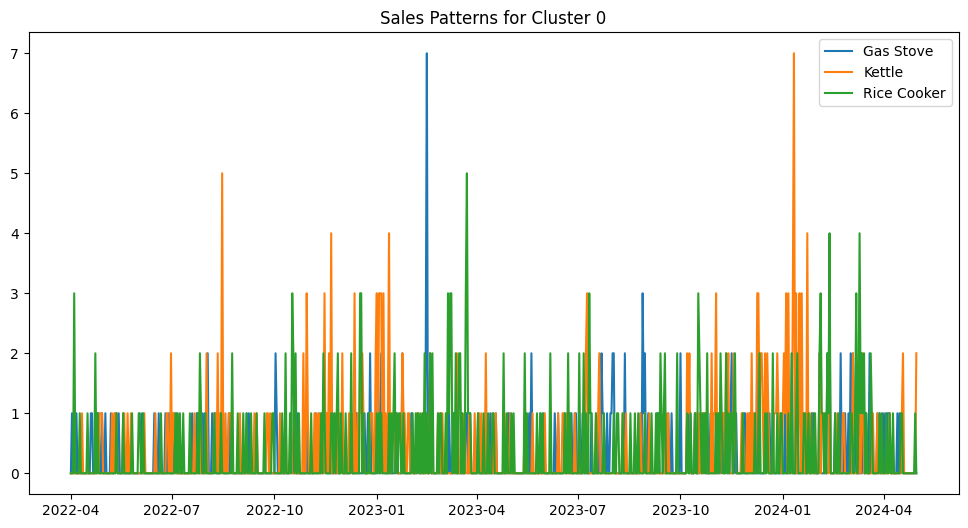

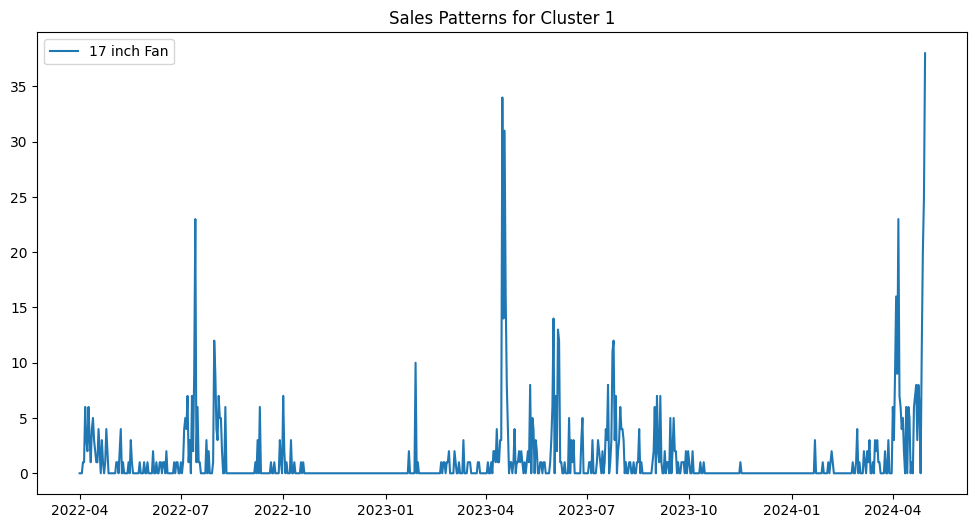

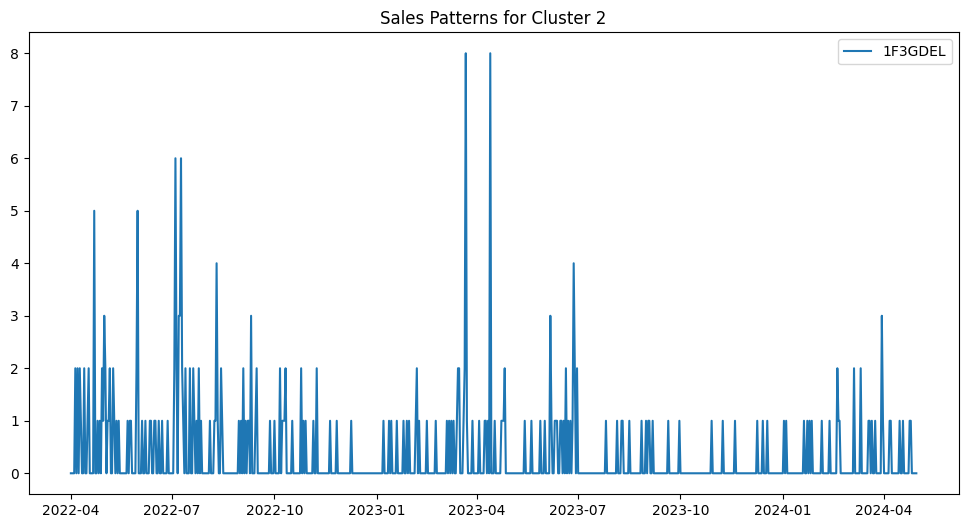

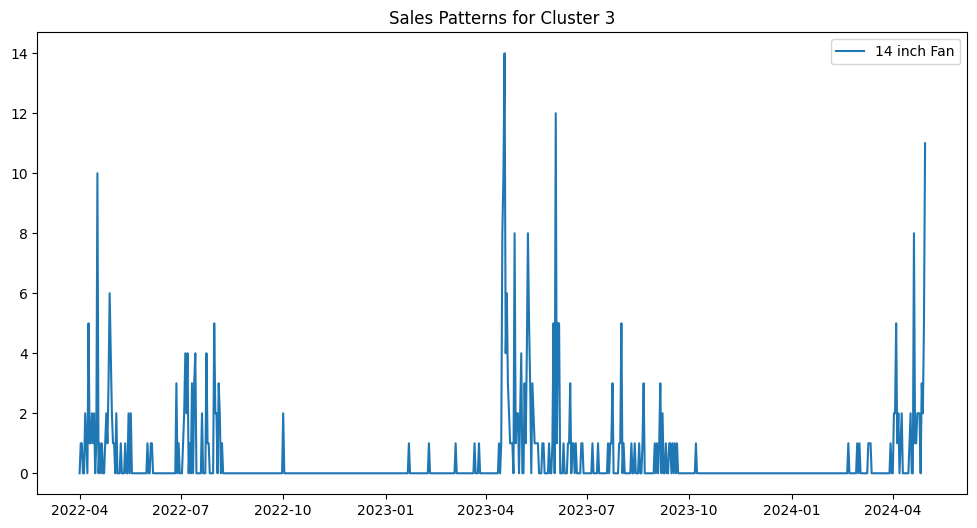

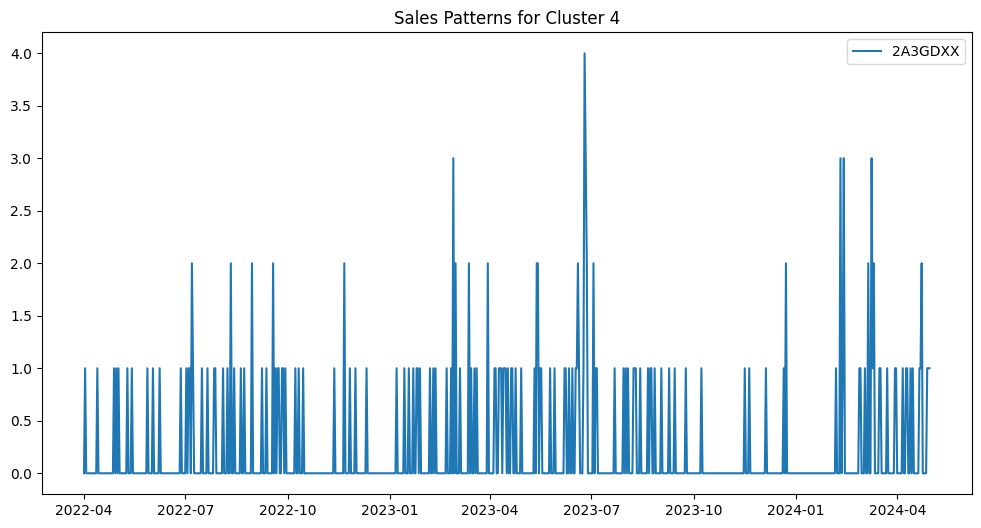

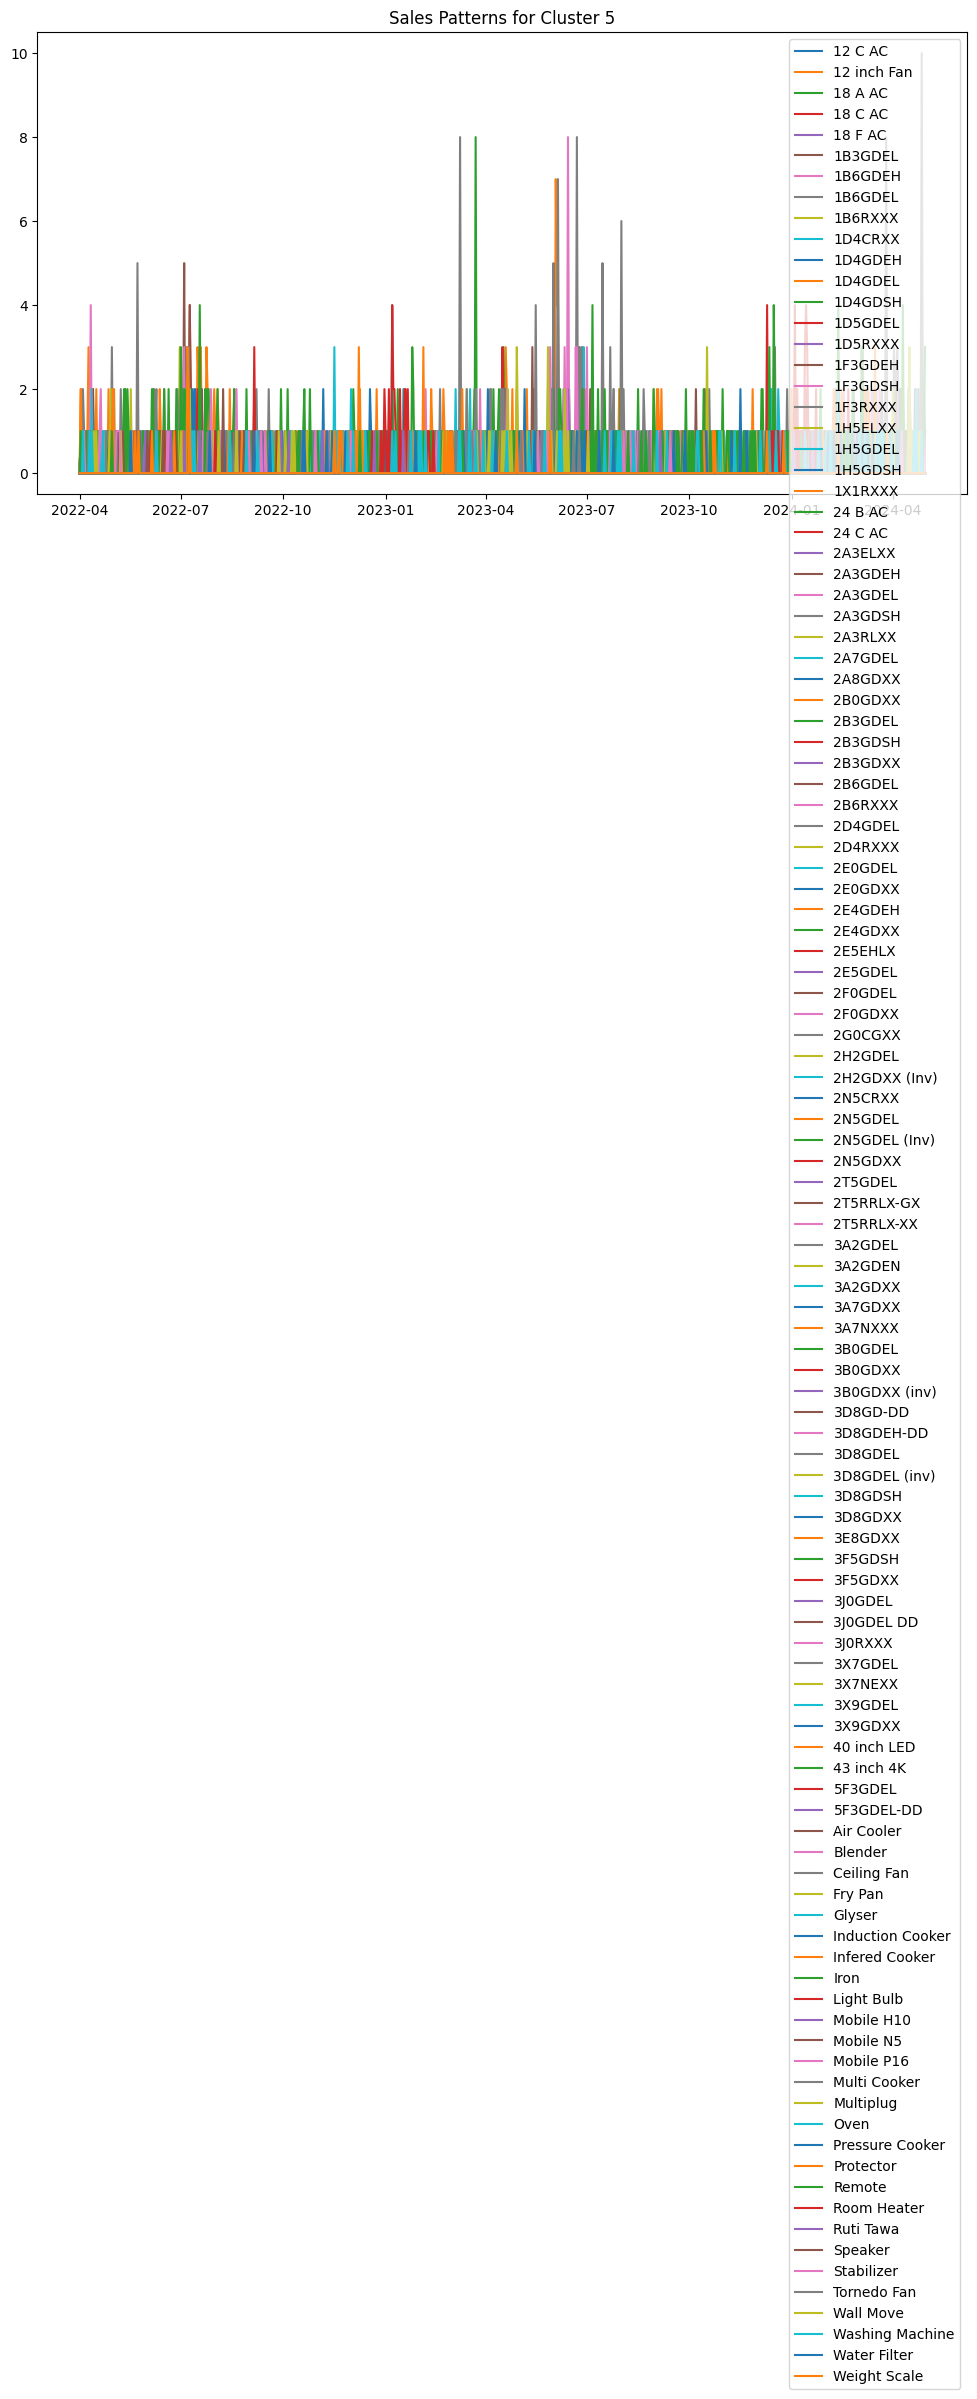

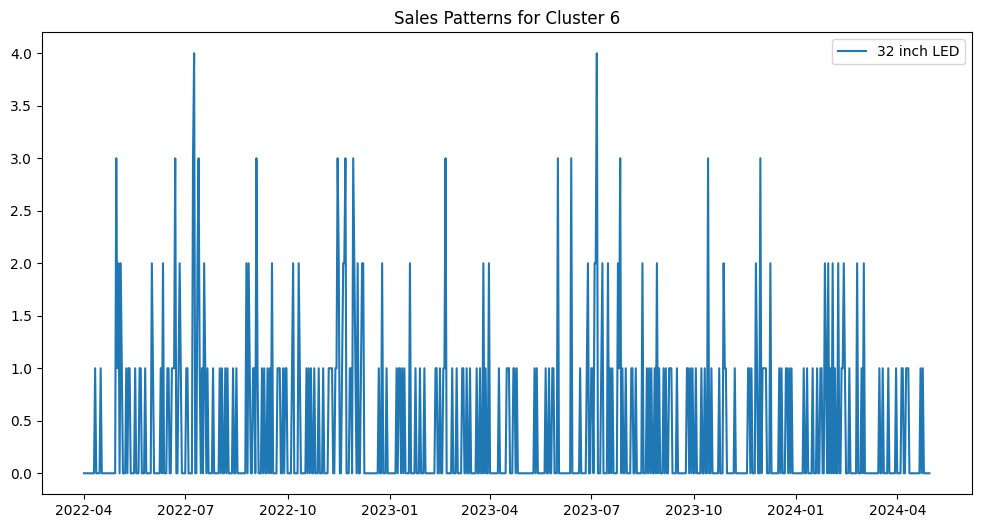

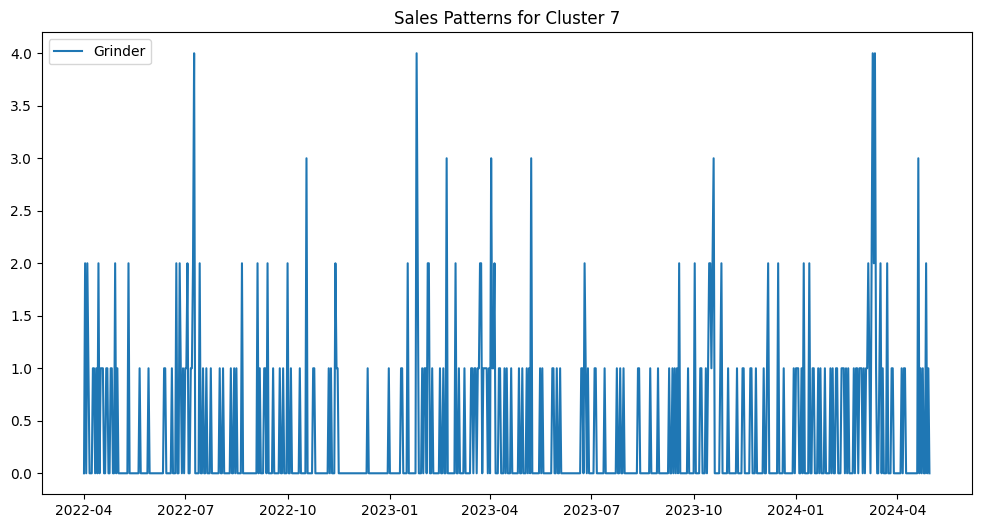

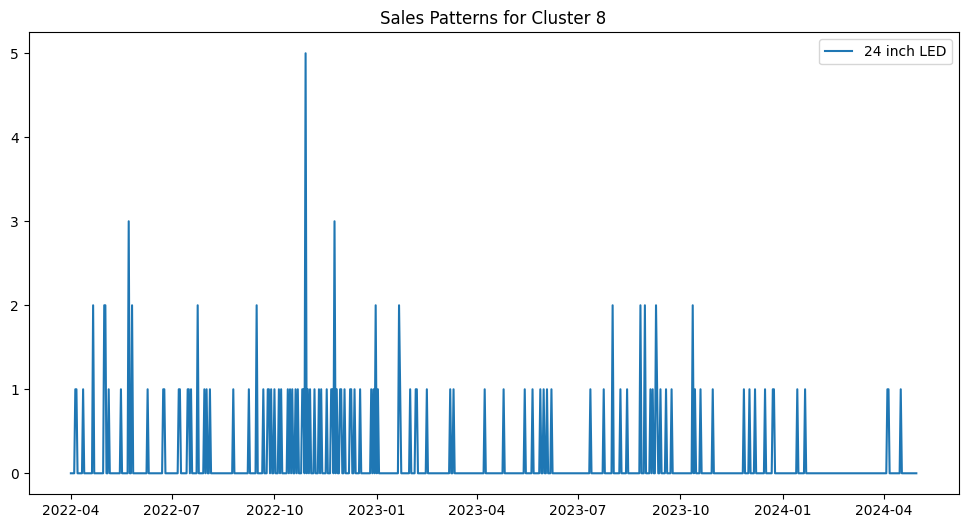

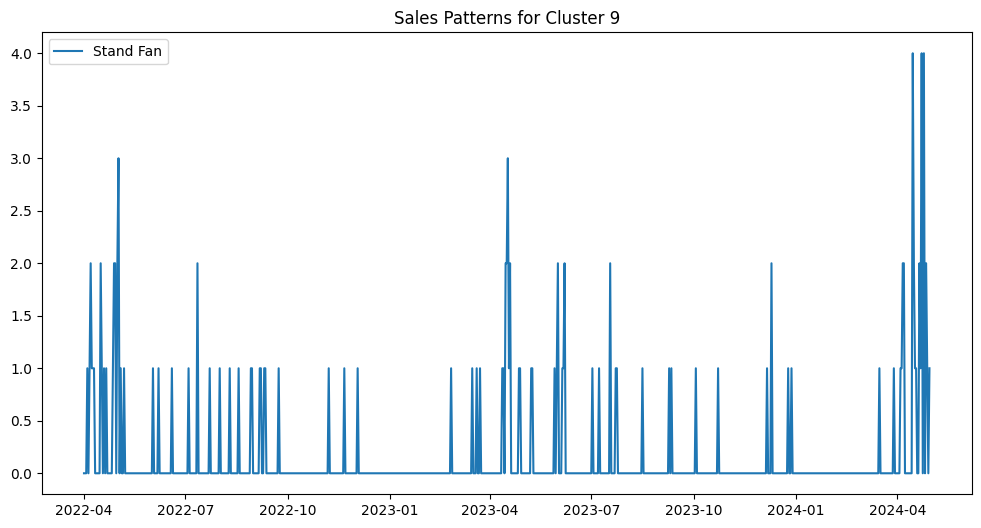

In [109]:
import matplotlib.pyplot as plt

for cluster in range(num_clusters):
    plt.figure(figsize = (12, 6))
    plt.title(f'Sales Patterns for Cluster {cluster}')
    for product in sales_pivot[sales_pivot['Cluster'] == cluster].index:
        plt.plot(sales_pivot.columns[:-1], sales_pivot.loc[product].values[:-1], label = product)
    plt.legend()
    plt.show()